Test LiveOcean BC's for new tidally average single time files

In [9]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import os
from salishsea_tools.LiveOcean_BCs import create_LiveOcean_TS_BCs

%matplotlib inline

In [10]:
# choose a date
ymd = '2018-06-20'
date = ymd.replace("-", "")

In [11]:
# make yourself a test directory
bc_dir = '/home/sallen/MEOPAR/test_dir/'
os.mkdir(bc_dir)

In [13]:
ourdatas = create_LiveOcean_TS_BCs(ymd, bc_dir=bc_dir)

In [15]:
ourdata = nc.Dataset(ourdatas)

In [16]:
print(ourdata)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    acknowledgements: Live Ocean http://faculty.washington.edu/pmacc/LO/LiveOcean.html
    creator_email: sallen@eoas.ubc.ca
    creator_name: SalishSeaCast Project Contributors
    creator_url: https://salishsea-meopar-docs.readthedocs.org/
    institution: UBC EOAS
    institution_fullname: Earth, Ocean & Atmospheric Sciences, University of British Columbia
    summary: Temperature, Salinity, Nitrate, Oxygen, DIC and TALKfrom the Live Ocean model interpolated in space onto the Salish Sea NEMO Model western open boundary. Silicon from Nitrate.
    source: http://nbviewer.org/urls/bitbucket.org/salishsea/.../LiveOceanNew
    history: [2018-07-14] File creation.
    dimensions(sizes): t(0), i(0), m(0), e(0), _(0), c(0), o(0), u(0), n(0), r(0), time_counter(1), deptht(40), yb(1), xbT(950)
    variables(dimensions): int64 time_counter(time_counter), float64 deptht(deptht), int64 yb(yb), int64 xbT(xbT), f

In [17]:
print(ourdata.variables['time_counter'])
print(ourdata.variables['time_counter'][:])

<class 'netCDF4._netCDF4.Variable'>
int64 time_counter(time_counter)
    units: minutes since 1970-01-01
    calendar: proleptic_gregorian
unlimited dimensions: time_counter
current shape = (1,)
filling on, default _FillValue of -9223372036854775806 used

[25491600]


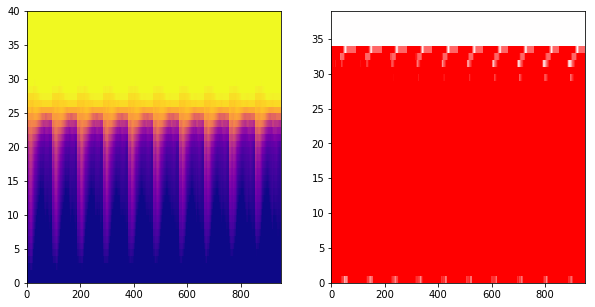

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].pcolormesh(ourdata.variables['vosaline'][0, :, 0, :], cmap='plasma', vmax=34, vmin=31.5)
ds = ourdata.variables['vosaline'][0, 1:, :, :] - ourdata.variables['vosaline'][0, :-1, :, :]
ax[1].pcolormesh(ds[:, 0], cmap='bwr', vmax=0.01, vmin=-0.01)

In [21]:
livedata = nc.Dataset(os.path.join('/results/forcing/LiveOcean/downloaded',date,'low_passed_UBC.nc'))

In [22]:
print(livedata)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    file: /pmr1/parker/LiveOcean_roms/output/cascadia1_base_lobio5/f2018.06.19/ocean_his_0002.nc
    format: netCDF-3 64bit offset file
    Conventions: CF-1.4, SGRID-0.3
    type: ROMS/TOMS history file
    title: First LiveOcean input file
    var_info: /pmr1/parker/LiveOcean_roms/LO_ROMS/ROMS/External/varinfo.dat
    rst_file: /pmr1/parker/LiveOcean_roms/output/cascadia1_base_lobio5/f2018.06.19/ocean_rst.nc
    his_base: /pmr1/parker/LiveOcean_roms/output/cascadia1_base_lobio5/f2018.06.19/ocean_his
    grd_file: /fjdata1/parker/LiveOcean_data/grids/cascadia1/grid.nc
    ini_file: /pmr1/parker/LiveOcean_roms/output/cascadia1_base_lobio5/f2018.06.18/ocean_his_0025.nc
    frc_file_01: /fjdata1/parker/LiveOcean_output/cascadia1_base/f2018.06.19/tide/tides.nc
    frc_file_02: /fjdata1/parker/LiveOcean_output/cascadia1_base/f2018.06.19/atm/lwrad_down.nc
    frc_file_03: /fjdata1/parker/LiveOcean_output/c

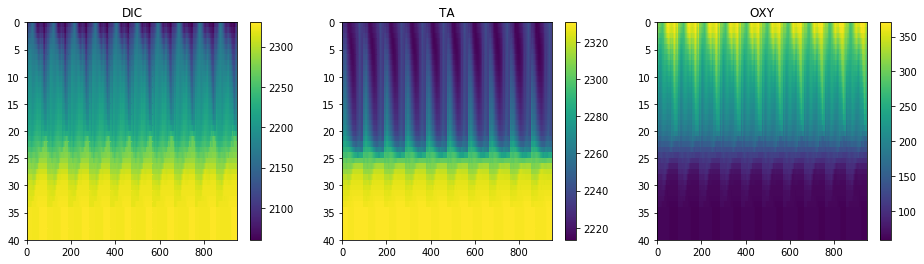

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for ix, var in enumerate(['DIC', 'TA', 'OXY']):
    mesh = axs[ix].pcolormesh(ourdata[var][0, :, 0])
    fig.colorbar(mesh, ax=axs[ix])
    axs[ix].invert_yaxis()
    axs[ix].set_title(var)

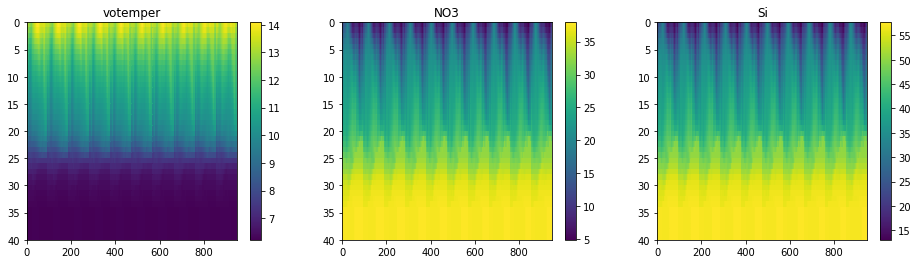

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for ix, var in enumerate(['votemper', 'NO3', 'Si']):
    mesh = axs[ix].pcolormesh(ourdata[var][0, :, 0])
    fig.colorbar(mesh, ax=axs[ix])
    axs[ix].invert_yaxis()
    axs[ix].set_title(var)

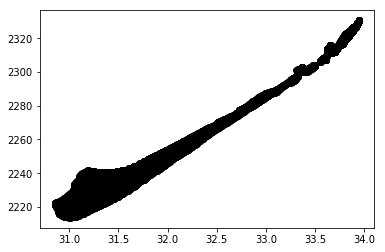

In [34]:
fig, ax = plt.subplots(1, 1)
ax.plot(ourdata.variables['vosaline'][0, :, 0] * 35 / 35.16504, ourdata.variables['TA'][0, :, 0], 'ok');

Don't forget to remove your test files and directory